# Connected:

In [16]:
import pandas as pd
import numpy as np

In [31]:
df=pd.read_csv('MlMediumTrainingData.csv')

In [32]:
df.shape

(2037, 3)

In [33]:
df.isnull().sum()

x_       0
y_       0
class    0
dtype: int64

In [34]:
df[df['class'] == -1]

,x_,y_,class
2029,15.739484,14.938739,-1
2030,-14.260516,-15.061261,-1
2031,-14.260516,14.938739,-1
2032,14.260516,-14.938739,-1
2033,0.739484,34.938739,-1
2034,-0.739484,-34.938739,-1
2035,20.739484,-0.061261,-1
2036,-20.739484,0.061261,-1


In [35]:
df.shape

(2037, 3)

<Axes: xlabel='x_', ylabel='y_'>

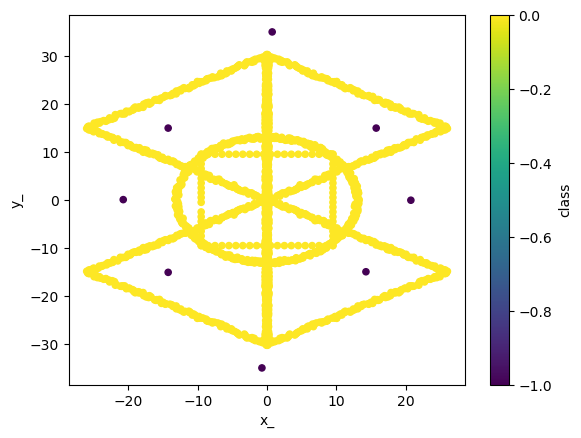

In [36]:
df.plot.scatter(x='x_', y='y_', c='class', colormap='viridis')

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
import time

In [39]:
# searching for the best leaf size to minimeze the clustering time
# min = 1000000
# for i in range(1, 1000):
#     cluster = DBSCAN(eps=3, min_samples=5, leaf_size=i)
#     avg = 0
#     for k in range(20):
#         start = time.time()
#         cluster.fit(df[['x_', 'y_']])
#         avg += time.time() - start
#     if avg < min:
#         min = avg
#         print('Leaf size: ', i, 'Elapsed time: ', avg/20)

# best leaf size found is 112 with an average of 0.0130 seconds

In [40]:
df.drop("class",axis=1,inplace=True)
df.loc[len(df)] = (1,2)
cluster = DBSCAN(eps=2, min_samples=5, leaf_size=112)
start = time.time()
cluster.fit(df)
print('Elapsed time: ', time.time() - start)

Elapsed time:  0.012837409973144531


In [42]:
cluster.labels_[-1]

0

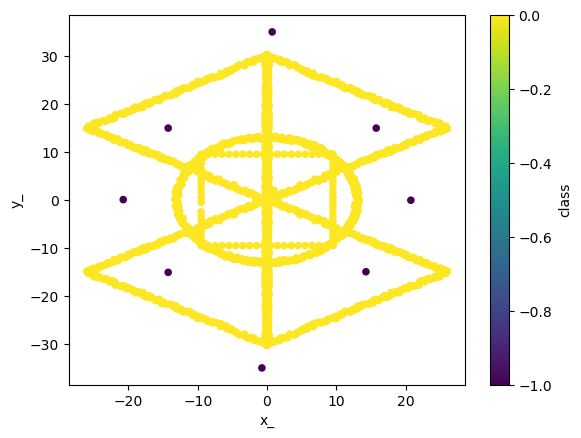

In [43]:
new_df = df.copy()
new_df['class'] = cluster.labels_
new_df.plot.scatter(x='x_', y='y_', c='class', colormap='viridis');

In [27]:
from json import load
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle


# Separate the majority and minority classes
df_majority = df[df['class'] == 0]
df_minority = df[df['class'] == -1]

# Upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine the upsampled minority class with the majority class
df_resampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the resampled dataframe
df_resampled = df_resampled.sample(frac=0.5, random_state=42)


X = df_resampled[['x_', 'y_']]
y = df_resampled['class']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Predict the classes for the test data
y_pred = logreg.predict(X_test)

# K-means Clustering
kmeans = KMeans(n_clusters=2)

# Fit the model on the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_
# Evaluate Logistic Regression
logreg_report = classification_report(y_test, y_pred)
print("Logistic Regression Classification Report:")
print(logreg_report)

# Evaluate K-means
kmeans_report = classification_report(y, labels)
print("K-means Classification Report:")
print(kmeans_report)

# Create a Random Forest Classifier model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict the classes for the test data
y_pred_rf = rf.predict(X_test)

# Create a Support Vector Classifier model
svc = SVC()

# Fit the model on the training data
svc.fit(X_train, y_train)

# Predict the classes for the test data
y_pred_svc = svc.predict(X_test)

# Evaluate Random Forest Classifier
rf_report = classification_report(y_test, y_pred_rf)
print("Random Forest Classifier Classification Report:")
print(rf_report)

# Evaluate Support Vector Classifier
svc_report = classification_report(y_test, y_pred_svc)
print("Support Vector Classifier Classification Report:")
print(svc_report)

# Save & loadthe random forest model
# Save the random forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)
    
# FILEPATH: /d:/Hack-Trick/AIMfinity/HackTrick24/Riddles/ml_medium_dataset/model.ipynb
with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf = pickle.load(file)


list_to_predict = [[14.26051583, -14.93873899]]
predicted_class = loaded_rf.predict(list_to_predict)
print(predicted_class)



c:\Users\PrinceEGY\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PrinceEGY\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PrinceEGY\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PrinceEGY\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-sc

Logistic Regression Classification Report:
              precision    recall  f1-score   support

        -1.0       0.59      0.37      0.45       196
         0.0       0.56      0.76      0.65       210

    accuracy                           0.57       406
   macro avg       0.57      0.56      0.55       406
weighted avg       0.57      0.57      0.55       406

K-means Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       992
         0.0       0.52      0.50      0.51      1037
         1.0       0.00      0.00      0.00         0

    accuracy                           0.25      2029
   macro avg       0.17      0.17      0.17      2029
weighted avg       0.26      0.25      0.26      2029

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

        -1.0       0.99      1.00      1.00       196
         0.0       1.00      1.00      1.00       210

    ac

c:\Users\PrinceEGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
